# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernible landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [187]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import torch
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

from torchvision import datasets, transforms


from typing import Tuple, List

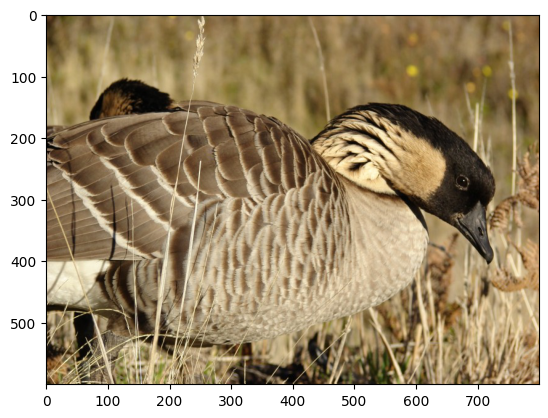

The shape of this picture is (600, 800, 3)


In [188]:
%matplotlib inline

# Show an example
img = mpimg.imread('images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg')
imgplot = plt.imshow(img)
plt.show()

print(f"The shape of this picture is {img.shape}")

In [189]:
# Creating datasets
all_images = datasets.ImageFolder("images")

In [190]:
# Look for general information in the data
all_images

Dataset ImageFolder
    Number of datapoints: 6246
    Root location: images

In [191]:
min_height, min_width = np.Inf, np.Inf
max_height, max_width = 0, 0

for img in all_images:
    min_height = np.min([img[0].size[0], min_height])
    min_width = np.min([img[0].size[1], min_width])
    
    max_height = np.max([img[0].size[0], max_height])
    max_width = np.max([img[0].size[1], max_width])

print(f"The smallest height of all images is: {min_height}")
print(f"The smallest width of all images is: {min_width}")

print(f"The largest height of all images is: {max_height}")
print(f"The largest width of all images is: {max_width}")

The smallest height of all images is: 225.0
The smallest width of all images is: 60.0
The largest height of all images is: 800
The largest width of all images is: 800


In [192]:
# setting a seed for reproducibility 
torch.manual_seed(10)
np.random.seed(10);

# Helper functions

In [15]:
2035.80/12

169.65

In [16]:
169.65 * 12

2035.8000000000002

In [193]:
def split_train_validation(train_data: datasets.ImageFolder, percentage: float) -> Tuple[List, List]:
    """ Shuffling the indices of the training data and splitting the indices into two lists
    depending on the given percentage
    
    Parameter
    -------------
    train_data: datasets.ImageFolder
    the training data image Folder set
    
    percentage: float
    Define the percentage to define the amount of data for the validation set
    
    Returns
    -------------
    A Tuple of lists with the indices for the training and validation. The first entry corresponds
    to the training set
    
    """
    total_num_train = len(train_data)
    indices = list(range(total_num_train))
    np.random.shuffle(indices)
    split_index = int(np.floor(percentage_valid * total_num_train))
    
    return indices[split_index:], indices[:split_index]

## IMPLEMENTATION

In [252]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

num_workers = 0
batch_size = 32

# Directories to the images
train_dir = "images/train"
test_dir = "images/test"

# Percentage for the validation set - set to 20%
percentage_valid = 0.2


# Defining transformation Composition for training set with some randomness
train_transform = transforms.Compose([transforms.Resize((256,256)),
                                      transforms.RandomResizedCrop(224),
                                      transforms.RandomRotation(45),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Defining transformation Composition for test set without any data augmentation 
test_transform = transforms.Compose([transforms.Resize((256,256)),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Creating datasets
train_data = datasets.ImageFolder(train_dir, transform=train_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

# Prepare split into train and validation 

# List all indices and randomly shuffle this list 
# depending on the validation percentage, split the data
train_idx, valid_idx = split_train_validation(train_data, percentage=percentage_valid)

# Creating random Subset Sampler 
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)


# Creating DataLoaders for train, validation and test 
trainloader = DataLoader(train_data, batch_size=batch_size,
                         sampler=train_sampler,
                         num_workers=num_workers)

validloader = DataLoader(train_data, batch_size=batch_size,
                         sampler=valid_sampler,
                         num_workers=num_workers)

testloader = DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)


loaders_scratch = {'train': trainloader, 'valid': validloader, 'test': testloader}


In [195]:
print(f"""The full training dataset contains {len(train_data)} images and splitted into a training
set with {(1-percentage_valid)*100}% ({len(loaders_scratch["train"].sampler)} images) of the full training data set and
{percentage_valid*100}% ({len(loaders_scratch["valid"].sampler)} images) is left in the validation set. 
""")

The full training dataset contains 4996 images and splitted into a training
set with 80.0% (3997 images) of the full training data set and
20.0% (999 images) is left in the validation set. 



**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: 

**1. I looped through the data to evaluate the smallest height and width in my data**
- The smallest height of all images is: 225
- The smallest width of all images is: 60 
- The largest height of all images is: 800
- The largest width of all images is: 800

Because of the wide range of width/heigth I choose to resize the data up to 256x256 and centercropped the images to 224x224 to have one general image shape. I chosed this input size to prepare the data for the following transfer leraning task aswell where the input is usually 224x224 (e.g. like ResNet)

**2. To prevent overfitting I used some dataaugmentation on the trainingset:**
- Random Resized Crop (224x224)
- Random Rotation with a degree up to +-45°
- Random Horizonzal Flip </br> <br>
    
**3. I also normalized my images to make the backpropagation more stable in the learning process**
- right now I'm squishing the values between -1 to 1 (for the transferlearning part I need to adapt the normalization to the model specs)

### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


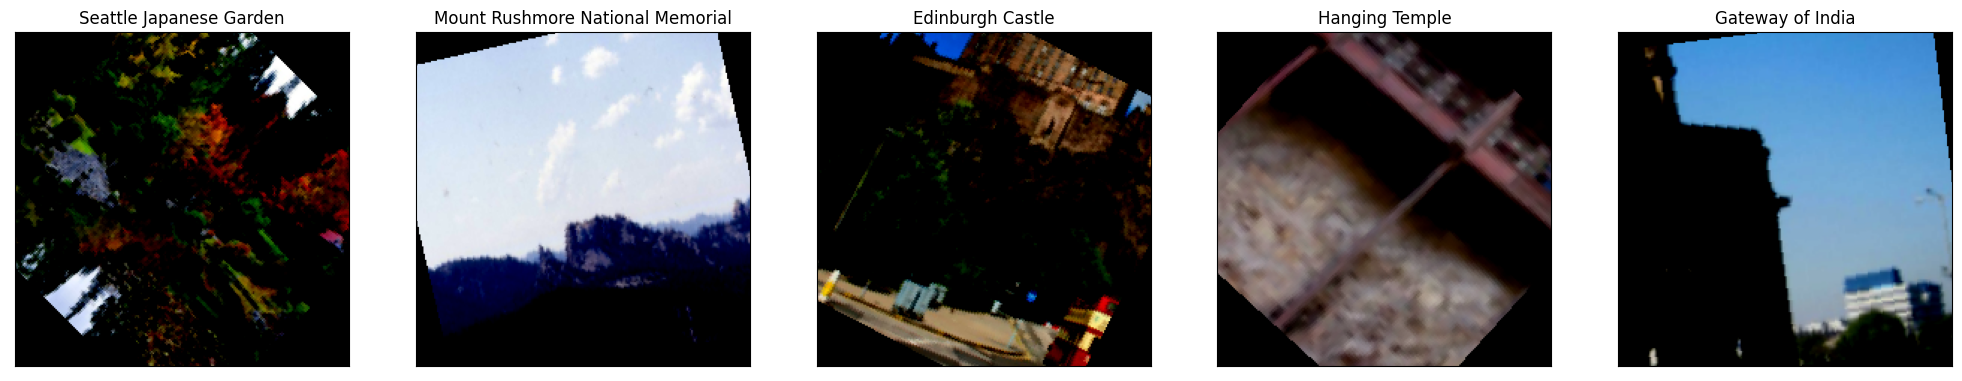

In [196]:
import matplotlib.pyplot as plt
%matplotlib inline

## TODO: visualize a batch of the train data loader

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)
    
# obtain one batch of training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 10))
for idx in np.arange(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx].permute(1, 2, 0)).numpy())
    label = [k for k, v in trainloader.dataset.class_to_idx.items() if v == labels[idx]]
    label = label[0].replace("_", " ").split(".")[1]
    ax.set_title(label)

### Initialize use_cuda variable

In [197]:
# check if CUDA is available

def check_gpu_avaible():
    """Checking the gpu status and returns the torch device if a gpu is avaible.
    """
    if torch.backends.mps.is_available():
        device = torch.device("mps")
        print("Running on MPS. M1 GPU is avaible")
        
    elif torch.cuda.is_available():
        device = torch.device("cuda")
        print("Running on Nvidia. Cuda is avaible")
        
    else:
        device = torch.device("cpu")
        print("Running on CPU")
        
    return device


In [198]:
# useful variable that tells us whether we should use the GPU
device = check_gpu_avaible()

Running on MPS. M1 GPU is avaible


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [199]:
from torch import nn
import torch.optim as optim
import torch.nn.functional as F

In [200]:
## TODO: select loss function
criterion_scratch = nn.NLLLoss()

def get_optimizer_scratch(model, learning_rate=0.001):
    ## TODO: select and return an optimizer
    return optim.Adam(model.parameters(), lr=learning_rate)

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [201]:
# amount of classes
len(train_data.classes)

50

In [202]:
class Net(nn.Module):
    # Example: Tensor torch input: 224x224 with 3 channels

    def __init__(self):
        super(BasicCNN, self).__init__()

        ## Define Layers of a CNN
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1) # After pooling: 112x112x8
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1) # After pooling: 56x56x16
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1) # After pooling: 28x28x32
        self.conv4 = nn.Conv2d(32, 64, 3, padding=1) # After pooling: 14x14x64

        # Pooling Layer
        self.pool = nn.MaxPool2d(2, 2)

        # Classification Layer
        self.fc1 = nn.Linear(14*14*64, 2048)
        self.fc2 = nn.Linear(2048, 512)
        self.fc3 = nn.Linear(512, 50) # 50 Classes/landmarks

        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        ## Define forward behavior

        # Passing through convolutional layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))

        # Flattening the images for the fully connected layers
        x = x.view(x.shape[0], -1)

        # passing through fully connected layers
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = F.log_softmax(self.fc3(x), dim=1)

        return x
#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
model_scratch.to(device)

Net(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=12544, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=50, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  

1. Created mutiple Convolutional Layer with increasing number of depth/filters with a kernelsize of 3x3 to extract more specific features. Added a Padding and left the stride by 1x1 to keep the dimension of the original Input.

2. After each convolutional layer I used Maxpooling to reduce the image size and keep the feature maps small

3. After the last convolutional layer I flattened the output tensor to prepare it for the fully connected (1 dimensional) layers

4. By using dropouts to the hidden fc Layers I trying to prevent overfitting and have a more generalized model

5. The output of the last layer will be logsoftmax'ed because i used NLLLoss and not the CrossEntropyLoss

- For each layer I used a Relu activation function


### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

**A QUESTION TO THE REVIEWER**

There are so many ways to calculate the loss, even there are some many differences in the notebooks of the course. What is the best way? Thank you! :) I mean this line: ```train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item()``` or only using ```total_train_loss += loss.item()``` (and divide it afterwards)

def train(n_epochs, loaders, model, optimizer, criterion, device, save_path="CNN.pt"):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        total_train_loss = 0.0
        total_valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to selected device
            data, target = data.to(device), target.to(device)

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))

            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            
            # update running training loss
            total_train_loss += loss.item()
            

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to device
            data, target = data.to(device), target.to(device)

            ## TODO: update average validation loss 

            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            
            # update running validation loss 
            total_valid_loss += loss.item()
            
        total_train_loss = total_train_loss/len(loaders['train'].sampler)
        total_valid_loss = total_valid_loss/len(loaders['valid'].sampler)    

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            total_train_loss,
            total_valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        
        if total_valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            total_valid_loss))
            
            torch.save(model.state_dict(), save_path)
            valid_loss_min = total_valid_loss
            
    return model

In [270]:
def train(n_epochs, loaders, model, optimizer, criterion, device, save_path="CNN.pt"):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        total_train_loss = 0.0
        total_valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to selected device
            data, target = data.to(device), target.to(device)

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))

            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            
            # update running training loss
            total_train_loss = total_train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - total_train_loss))
            

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to device
            data, target = data.to(device), target.to(device)

            ## TODO: update average validation loss 

            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            
            # update running validation loss 
            total_valid_loss = total_valid_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - total_valid_loss))
               

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            total_train_loss,
            total_valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        
        if total_valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            total_valid_loss))
            
            torch.save(model.state_dict(), save_path)
            valid_loss_min = total_valid_loss
            
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [315]:
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    if isinstance(m, nn.Linear):
        n = m.in_features
        y = (1.0/np.sqrt(n))
        
        m.weight.data.normal_(0.0, y)
        m.bias.data.fill_(0)

#-#-# Do NOT modify the code below this line. #-#-#
    
model_scratch.apply(custom_weight_init)
model_scratch = train(10, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                      criterion_scratch, device, 'ignore.pt')

Epoch: 1 	Training Loss: 3.924209 	Validation Loss: 3.914335
Validation loss decreased (inf --> 3.914335).  Saving model ...
Epoch: 2 	Training Loss: 3.913308 	Validation Loss: 3.914090
Validation loss decreased (3.914335 --> 3.914090).  Saving model ...
Epoch: 3 	Training Loss: 3.912357 	Validation Loss: 3.915144
Epoch: 4 	Training Loss: 3.912090 	Validation Loss: 3.916339
Epoch: 5 	Training Loss: 3.912108 	Validation Loss: 3.916873
Epoch: 6 	Training Loss: 3.911802 	Validation Loss: 3.917813
Epoch: 7 	Training Loss: 3.911836 	Validation Loss: 3.917981
Epoch: 8 	Training Loss: 3.911700 	Validation Loss: 3.918867
Epoch: 9 	Training Loss: 3.911681 	Validation Loss: 3.918975
Epoch: 10 	Training Loss: 3.911611 	Validation Loss: 3.919697


### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [206]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 75

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, device, "model_scratch.pt")

Epoch: 1 	Training Loss: 3.916276 	Validation Loss: 3.912342
Validation loss decreased (inf --> 3.912342).  Saving model ...
Epoch: 2 	Training Loss: 3.890123 	Validation Loss: 3.861820
Validation loss decreased (3.912342 --> 3.861820).  Saving model ...
Epoch: 3 	Training Loss: 3.821746 	Validation Loss: 3.750092
Validation loss decreased (3.861820 --> 3.750092).  Saving model ...
Epoch: 4 	Training Loss: 3.746645 	Validation Loss: 3.743626
Validation loss decreased (3.750092 --> 3.743626).  Saving model ...
Epoch: 5 	Training Loss: 3.741139 	Validation Loss: 3.739697
Validation loss decreased (3.743626 --> 3.739697).  Saving model ...
Epoch: 6 	Training Loss: 3.703453 	Validation Loss: 3.699592
Validation loss decreased (3.739697 --> 3.699592).  Saving model ...
Epoch: 7 	Training Loss: 3.677025 	Validation Loss: 3.688872
Validation loss decreased (3.699592 --> 3.688872).  Saving model ...
Epoch: 8 	Training Loss: 3.640868 	Validation Loss: 3.648381
Validation loss decreased (3.68887

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [269]:
def test(loaders, model, criterion, device):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU

        data, target = data.to(device), target.to(device)
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, device)



Test Loss: 2.413442


Test Accuracy: 40% (512/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [265]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

num_workers = 0
batch_size = 32

# Directories to the images
train_dir = "images/train"
test_dir = "images/test"

# Percentage for the validation set - set to 20%
percentage_valid = 0.2


# Defining transformation Composition for training set with some randomness
train_transform = transforms.Compose([transforms.Resize((256,256)),
                                      transforms.RandomResizedCrop(224),
                                      transforms.RandomRotation(45),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.485, 0.456, 0.406),
                                                           (0.229, 0.224, 0.225))])

# Defining transformation Composition for test set without any data augmentation 
test_transform = transforms.Compose([transforms.Resize((256,256)),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.485, 0.456, 0.406),
                                                          (0.229, 0.224, 0.225))])

# Creating datasets
train_data = datasets.ImageFolder(train_dir, transform=train_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

# Prepare split into train and validation 

# List all indices and randomly shuffle this list 
# depending on the validation percentage, split the data
train_idx, valid_idx = split_train_validation(train_data, percentage=percentage_valid)

# Creating random Subset Sampler 
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)


# Creating DataLoaders for train, validation and test 
trainloader = DataLoader(train_data, batch_size=batch_size,
                         sampler=train_sampler,
                         num_workers=num_workers)

validloader = DataLoader(train_data, batch_size=batch_size,
                         sampler=valid_sampler,
                         num_workers=num_workers)

testloader = DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)


loaders_transfer = {'train': trainloader, 'valid': validloader, 'test': testloader}

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [3]:
from collections import OrderedDict
from torchvision import models

import torch.nn as nn

In [275]:
## TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()

def get_optimizer_transfer(model, learning_rate=0.001):
    ## TODO: select and return an optimizer
    return optim.Adam(model.fc.parameters(), lr=learning_rate)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [10]:
# Freeze training for all "features" layers

resnet_model = models.resnet50(weights="IMAGENET1K_V2")

for param in resnet_model.parameters():
    print
    param.requires_grad = False

resnet_model.fc = nn.Sequential(nn.Linear(2048, 1024),
                           nn.ReLU(),
                         nn.Dropout(p=0.3),
                        nn.Linear(1024, 50))

#-#-# Do NOT modify the code below this line. #-#-#

In [11]:
resnet_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
resnet_model.fc[0].in_features

TypeError: 'Linear' object is not subscriptable

In [ ]:
resnet_model = resnet_model.to(device)

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

0. I've changed the Normalization for the ResNet model - see ResNet documentation

1. I chose a ResNet50 as a pretrained model to classify the images which has high accuracies at the ImageNet-1K and relativ "small" model with 25.6 million parameters (For example VGG16 -> 138.4M)

2. I used the Adam optimizer in this case because it performed better than SDG and the results were reasonably good

3. I ve changed the fc classifier for my purpose - I have 50 classes/landmarks to classify so I added one hidden Layer and the outputlayer with 50 neurons

4. I freezed all other model parameters and changing the weights of my "classifier" because the task is similar to what the ResNet model is trained for.

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [277]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'

num_epochs = 20

# train the model
resnet_model = train(num_epochs, loaders_transfer, resnet_model, get_optimizer_transfer(resnet_model), 
                      criterion_transfer, device, "resnet_model.pt")

#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
resnet_model.load_state_dict(torch.load('resnet_model.pt'))

Epoch: 1 	Training Loss: 2.740062 	Validation Loss: 1.869286
Validation loss decreased (inf --> 1.869286).  Saving model ...
Epoch: 2 	Training Loss: 1.665703 	Validation Loss: 1.571848
Validation loss decreased (1.869286 --> 1.571848).  Saving model ...
Epoch: 3 	Training Loss: 1.430260 	Validation Loss: 1.460455
Validation loss decreased (1.571848 --> 1.460455).  Saving model ...
Epoch: 4 	Training Loss: 1.240721 	Validation Loss: 1.421713
Validation loss decreased (1.460455 --> 1.421713).  Saving model ...
Epoch: 5 	Training Loss: 1.132398 	Validation Loss: 1.362832
Validation loss decreased (1.421713 --> 1.362832).  Saving model ...
Epoch: 6 	Training Loss: 1.066774 	Validation Loss: 1.393229
Epoch: 7 	Training Loss: 0.982987 	Validation Loss: 1.310991
Validation loss decreased (1.362832 --> 1.310991).  Saving model ...
Epoch: 8 	Training Loss: 0.941449 	Validation Loss: 1.389079
Epoch: 9 	Training Loss: 0.906208 	Validation Loss: 1.354216
Epoch: 10 	Training Loss: 0.834000 	Valida

<All keys matched successfully>

In [ ]:
"""## TODO: ANOTHER TRY -> Training took longer, result were worse than resnet

## TODO: select loss function
criterion_transfer = nn.NLLLoss()

def get_optimizer_transfer(model, learning_rate=0.001):
    ## TODO: select and return an optimizer
    return optim.SGD(model.classifier[6].parameters(), lr=learning_rate)

model_transfer = models.vgg16(weights="DEFAULT")

# Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.requires_grad = False

custom_classifier = nn.Sequential(OrderedDict([
                              ('fc3', nn.Linear(4096, 50)),
                              ('output', nn.LogSoftmax(dim=1))
                              ]))

model_transfer.classifier[6] = custom_classifier

#-#-# Do NOT modify the code below this line. #-#-#


model_transfer = model_transfer.to(device)"""

In [ ]:
"""# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'

num_epochs = 20

# train the model
model_transfer = train(num_epochs, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer), 
                      criterion_transfer, device, "model_transfer.pt")

#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))"""

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [278]:
test(loaders_transfer, resnet_model, criterion_transfer, device)

Test Loss: 0.900294


Test Accuracy: 78% (980/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [279]:
import cv2
from PIL import Image
from collections import OrderedDict

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

def predict_landmarks(img_path, k):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    image = test_transform(Image.open(img_path))
    vit_model.to("cpu")
    # output = model(image[None,:])
    
    output = vit_model(image.unsqueeze(0))
    ps = torch.exp(output)
    top_p, top_classes = ps.topk(k, dim=1)
    
    pred_labels = [train_data.classes[top_class] for top_class in top_classes[0]]   
    #predictions = OrderedDict((label, p.item()) for label, p in zip(pred_labels, top_p[0]))
    
    return pred_labels

# test on a sample image
output = predict_landmarks('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 3)

In [280]:
output

['09.Golden_Gate_Bridge', '30.Brooklyn_Bridge', '28.Sydney_Harbour_Bridge']

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

In [316]:
# to show the preprocessed image too
image_transform = transforms.Compose([transforms.Resize((256,256)),
                                      transforms.CenterCrop(224),
                                     transforms.ToTensor()])

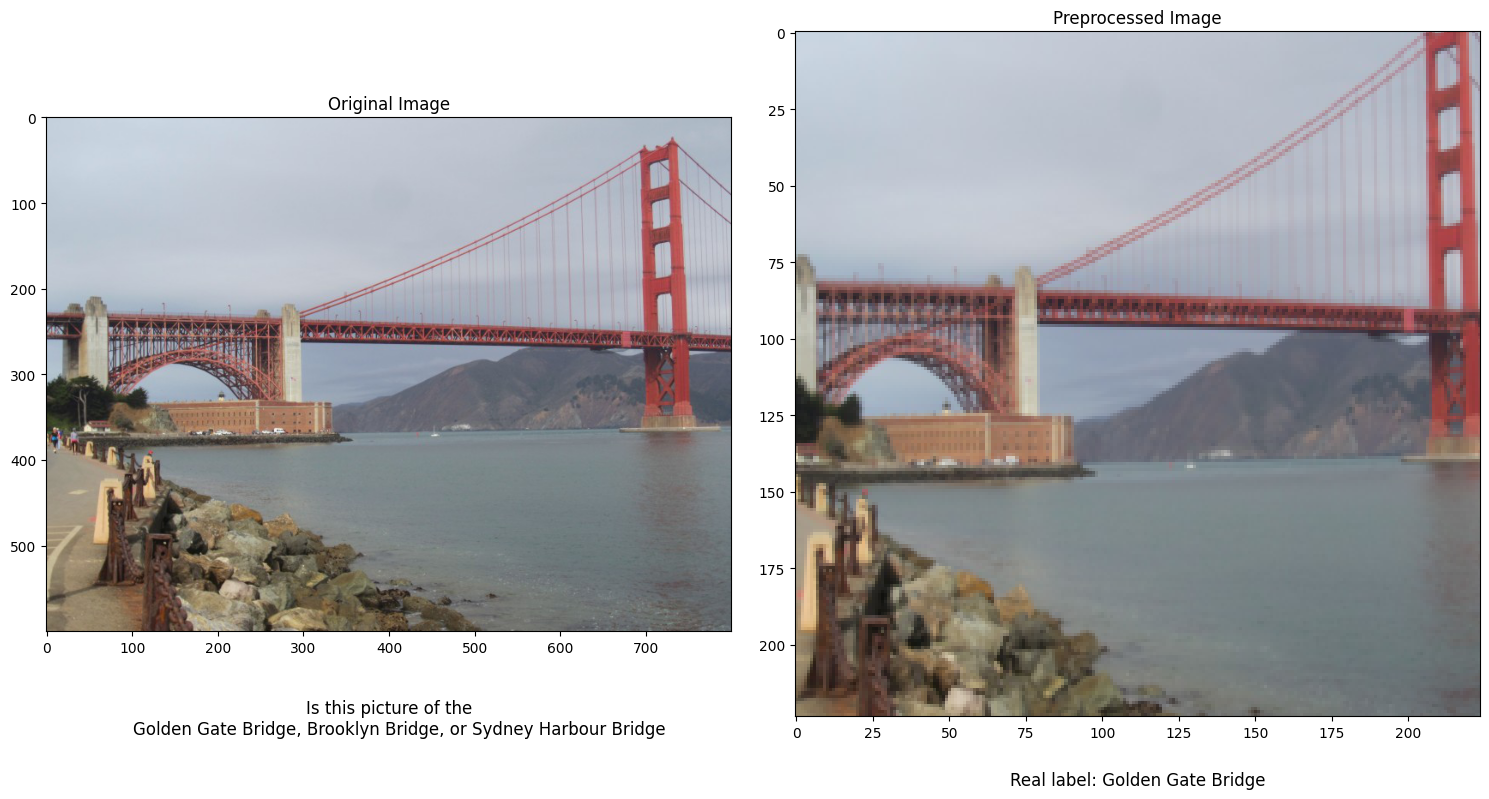

In [317]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    
    ## TODO: display image and display landmark predictions
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
    img = Image.open(img_path)
    transformed_img = image_transform(img).permute([1,2,0])
    
    predicted_landmarks = [landmark.split(".")[1] for landmark in predicted_landmarks]
    predicted_landmarks[-1] = "or " + predicted_landmarks[-1]
    
    label_text = ", ".join(predicted_landmarks).replace("_", " ")
    
    text = f"""Is this picture of the
    {label_text}"""
    
    
    imgplot = ax1.imshow(img)
    ax1.text(0.5, -0.2, text, size=12, ha="center", transform=ax1.transAxes)
    ax1.title.set_text("Original Image")
    
    ax2.imshow(transformed_img)
    ax2.title.set_text("Preprocessed Image")
    
    ax2_text = f"Real label: {img_path.split('/')[2].split('.')[1].replace('_',' ')}" 
    ax2.text(0.5, -0.1, ax2_text, size=12, ha="center", transform=ax2.transAxes)
    
    plt.tight_layout()
    plt.show()
    
    return imgplot
    

# test on a sample image
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg');

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

The results is better than expected, nearly 80% accuracy 

Possible Improvements:

- Changing the the optimizer/loss criterion or the structure of the classifier layer
- Retrain the full network on the data, not only the classifier layer or use another pretrained model
- Train longer than 20 epochs
- Hyperparamtertuning (Learning Rate, Batch size -> Using GridSearch or RandomSearch) 
- Use other data augmentations or change the hyperparameter in this existing ones


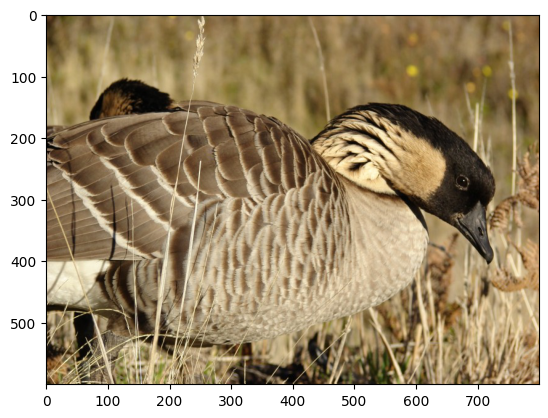

In [155]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.

# plot the images in the batch, along with the corresponding labels
# Show an example



In [308]:
import glob
import random

In [309]:
test_images = glob.glob("images/test/*/*.jpg")

In [310]:
random_test_set = random.choices(test_images, k=5)

images/test/45.Temple_of_Heaven/25153699a1d7a4d6.jpg
----------------------------------------------------------------------------------------------------



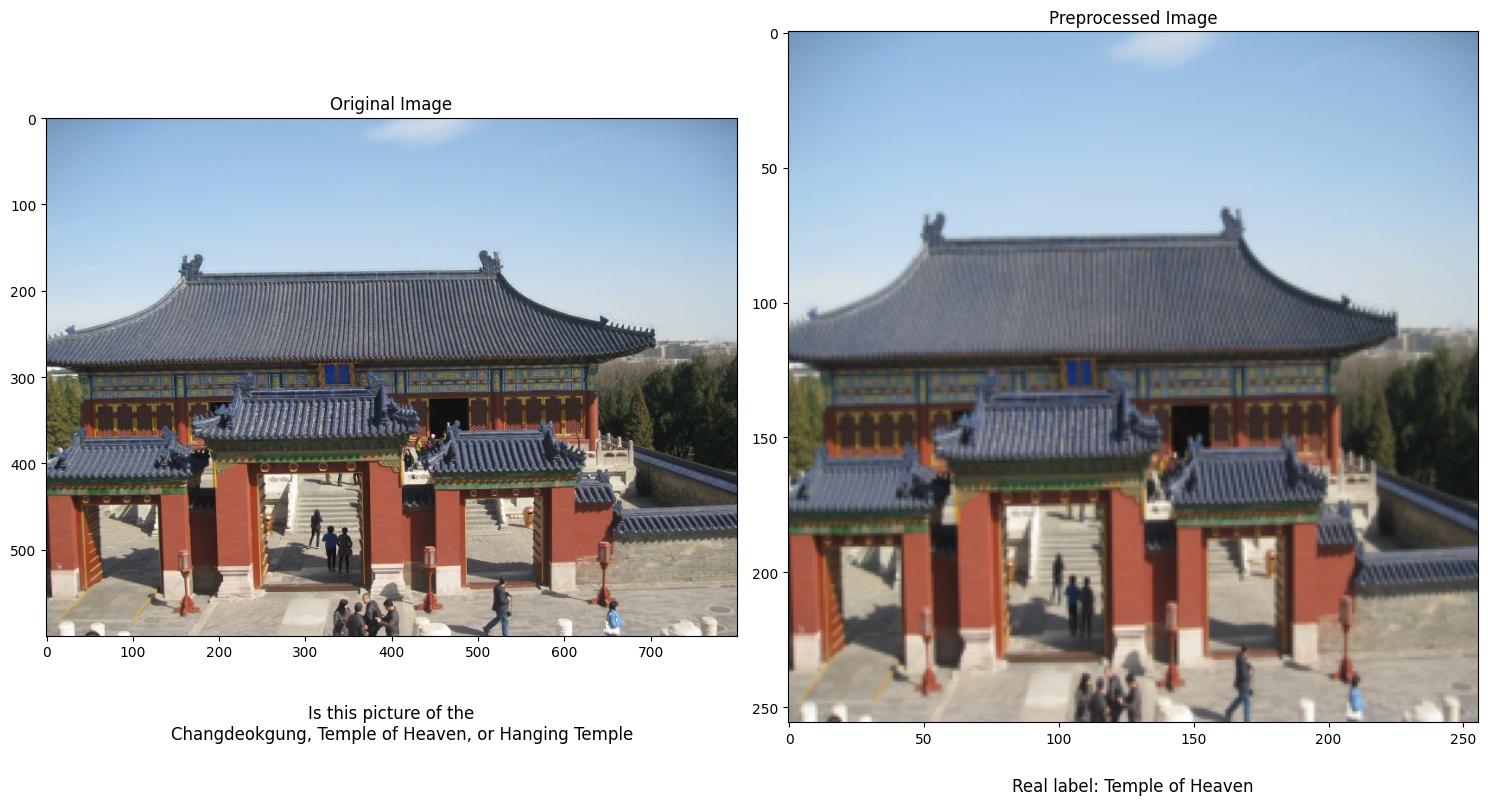

images/test/09.Golden_Gate_Bridge/6d9b1f06226cffd4.jpg
----------------------------------------------------------------------------------------------------



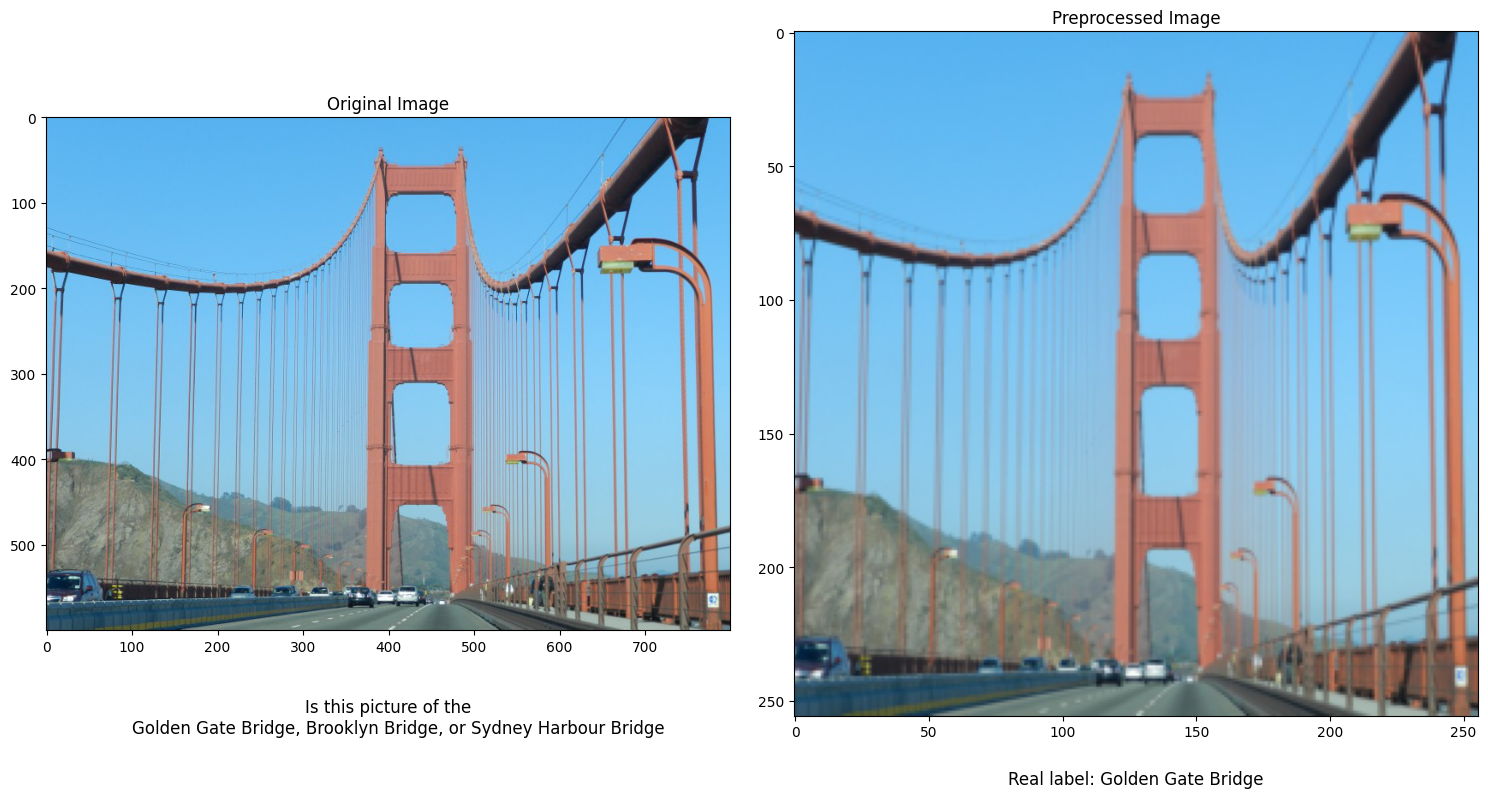

images/test/10.Edinburgh_Castle/6c9d4d00d14e1d81.jpg
----------------------------------------------------------------------------------------------------



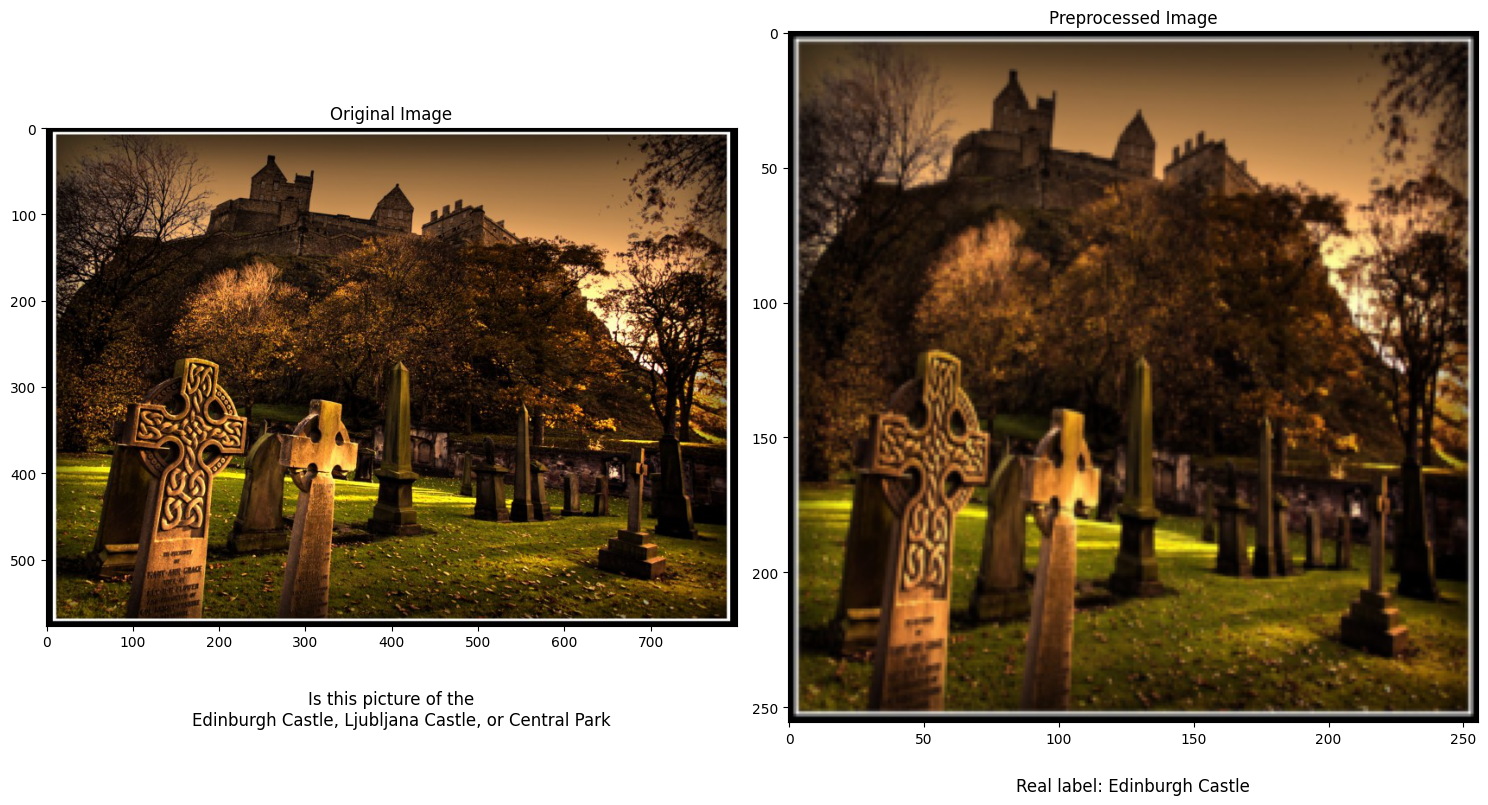

images/test/02.Ljubljana_Castle/755865f1ff4d389e.jpg
----------------------------------------------------------------------------------------------------



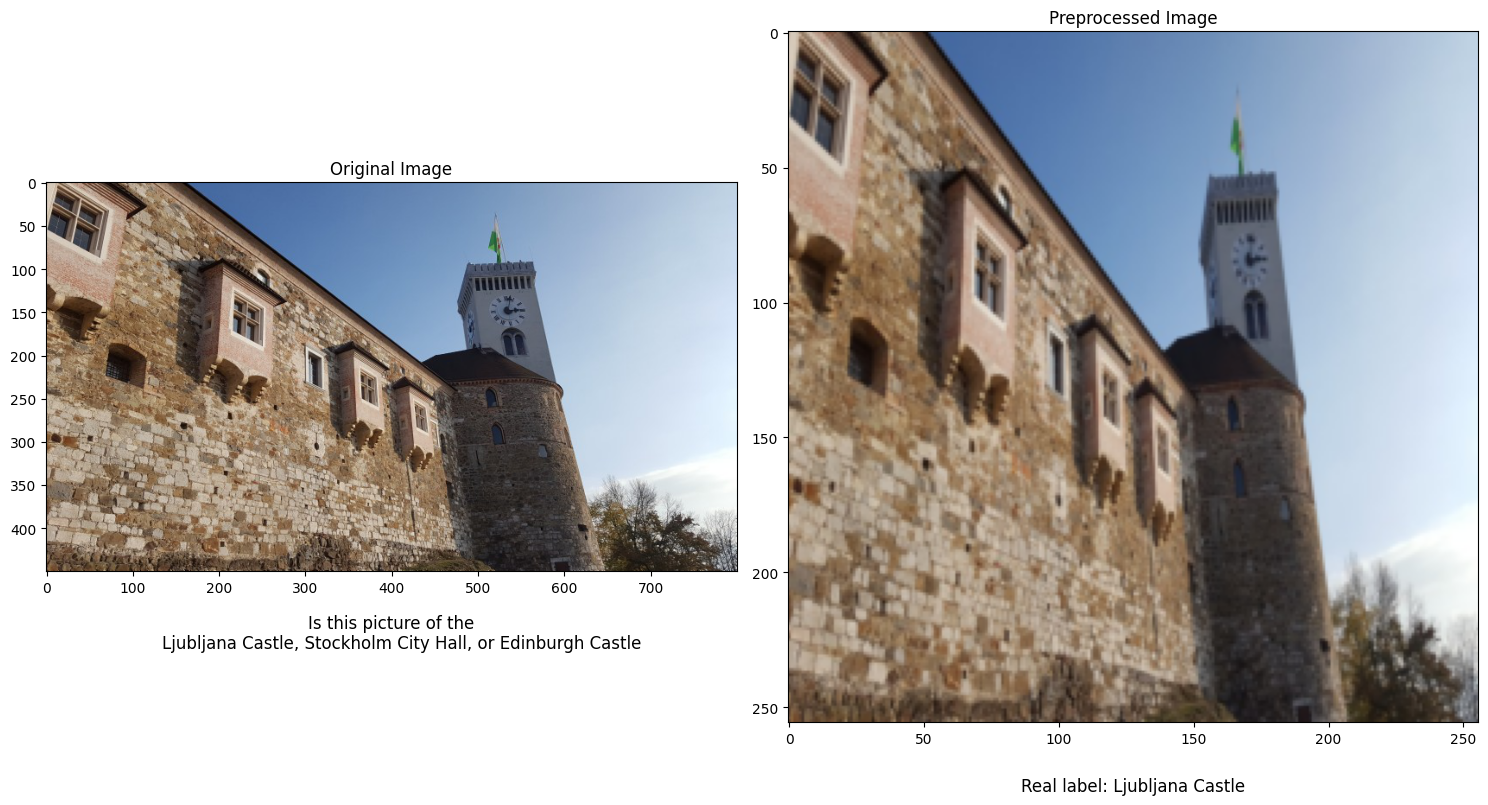

images/test/14.Terminal_Tower/323f121115563b70.jpg
----------------------------------------------------------------------------------------------------



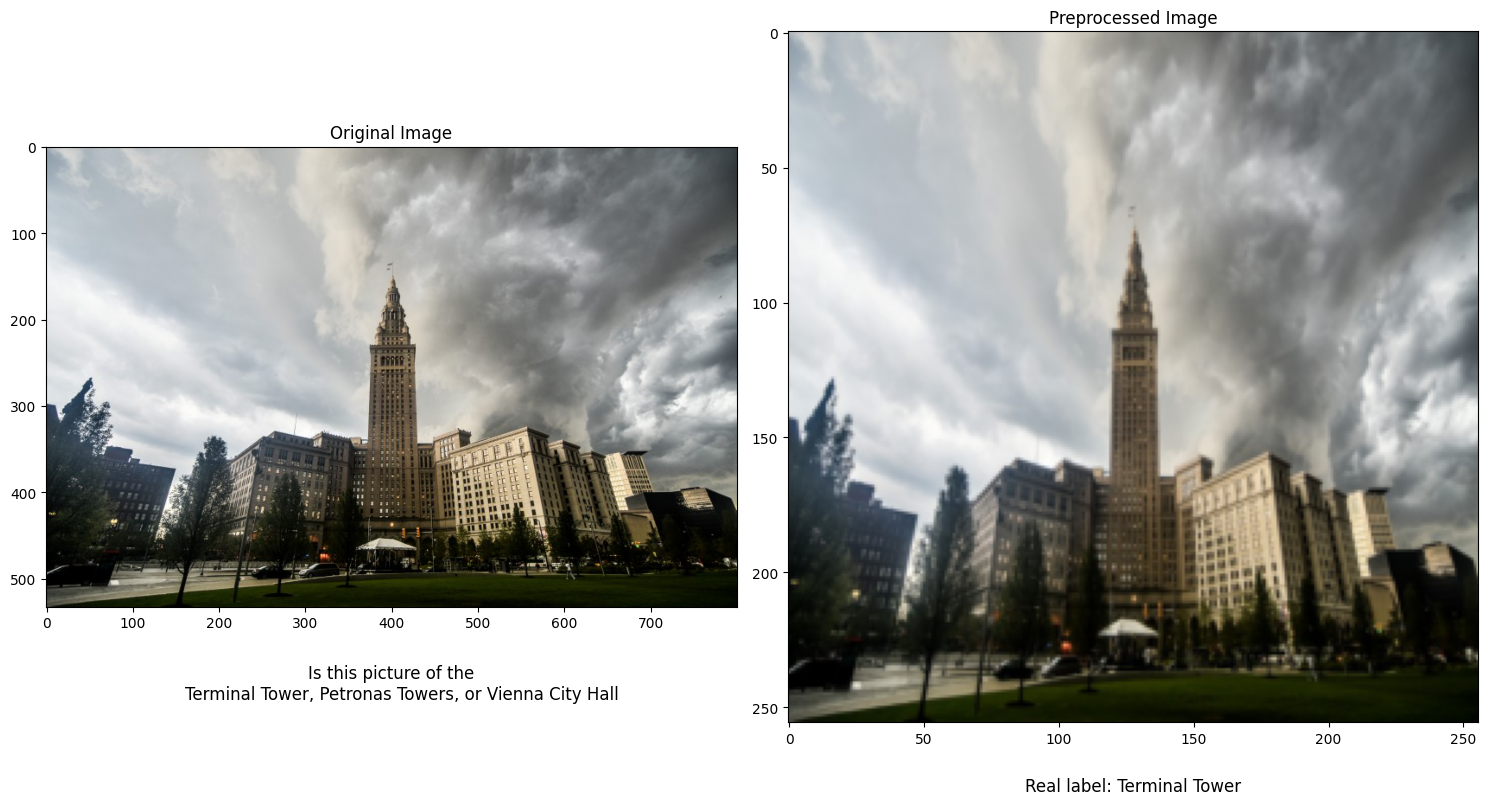

In [314]:
for test_image_path in random_test_set:
    print(test_image_path)
    print("-"*100+"\n")
    suggest_locations(test_image_path)